## ================================ PT. 3 ================================
#  >>>>>>>>>>>>>>>>>>>> MACHINE LEARNING <<<<<<<<<<<<<<<<<<<<
## =====================================================================

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Time-Series Machine Learning on 2011-2019 Data
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Regression for Dataset 2
###  –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [2]:
BusMRTGeoData = pd.read_csv('BusMRTGeoData.csv')
BusMRTGeoData

,SUBZONE_N,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_PEAK,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE,WEEKDAY_PERCENTAGE,"('2020', 'Male Percentage')","('2020', '00 - 19')","('2020', '20 - 39')","('2020', '40 - 59')","('2020', '60 & Over')","('2020', 'Average Income')"
0,ALJUNIED,477236.0,2649777.0,2670371.0,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,147583.0,818550.0,849757.0,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,122622.0,674735.0,811713.0,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,700065.0,3896305.0,4425740.0,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,155476.0,854617.0,878224.0,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,572727.0,3126930.0,3289376.0,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,254941.0,1409087.0,1579596.0,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,302951.0,1653555.0,1746928.0,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,288341.0,1520813.0,1365389.0,7430472.0,0.204672,0.918777,NaN,0,0,0,0,NaN


In [3]:
BusMRTGeoData_reg = BusMRTGeoData.filter(['SUBZONE_N', 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', 'PEAK_HOUR_PERCENTAGE', 'WEEKDAY_PERCENTAGE', "('2020', 'Male Percentage')", "('2020', '00 - 19')", "('2020', '20 - 39')", "('2020', '40 - 59')", "('2020', '60 & Over')", "('2020', 'Average Income')"], axis = 1)
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Male Percentage')": 'Male Percentage'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '00 - 19')": '00 - 19'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '20 - 39')": '20 - 39'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '40 - 59')": '40 - 59'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', '60 & Over')": '60 & Over'})
BusMRTGeoData_reg = BusMRTGeoData_reg.rename(columns={"('2020', 'Average Income')": 'Average Income'})
BusMRTGeoData_reg['Male Percentage'] = BusMRTGeoData_reg['Male Percentage'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg['Average Income'] = BusMRTGeoData_reg['Average Income'].replace(np.nan, 0) #Replace '-' with '0'
BusMRTGeoData_reg

,SUBZONE_N,AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY,PEAK_HOUR_PERCENTAGE,WEEKDAY_PERCENTAGE,Male Percentage,00 - 19,20 - 39,40 - 59,60 & Over,Average Income
0,ALJUNIED,15454280.0,0.171459,0.863958,0.493623,6150,10720,12170,10940,11730.102220
1,ANAK BUKIT,4909818.0,0.166717,0.865365,0.474166,4280,5660,6190,5750,19739.484317
2,ANCHORVALE,4596871.0,0.146781,0.882897,0.492519,13550,14460,13710,6410,10559.805071
3,BEDOK NORTH,25472206.0,0.152963,0.868739,0.485093,13230,20760,24610,23260,8815.353975
4,BEDOK RESERVOIR,5012083.0,0.170511,0.876107,0.489988,5280,6820,7960,5420,12406.950807
...,...,...,...,...,...,...,...,...,...,...
81,WOODLANDS EAST,18614145.0,0.167987,0.883569,0.499949,23130,30470,31480,13910,9709.300993
82,WOODLANDS WEST,8975706.0,0.156989,0.879929,0.508994,6220,10300,9840,7560,7374.195426
83,YEW TEE,9926964.0,0.166572,0.879890,0.497771,8460,11480,13730,6730,11017.340267
84,YIO CHU KANG,7430472.0,0.204672,0.918777,0.000000,0,0,0,0,0.000000


## Uni-Variate Linear Models

### Variable 1: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using PEAK_HOUR_PERCENTAGE

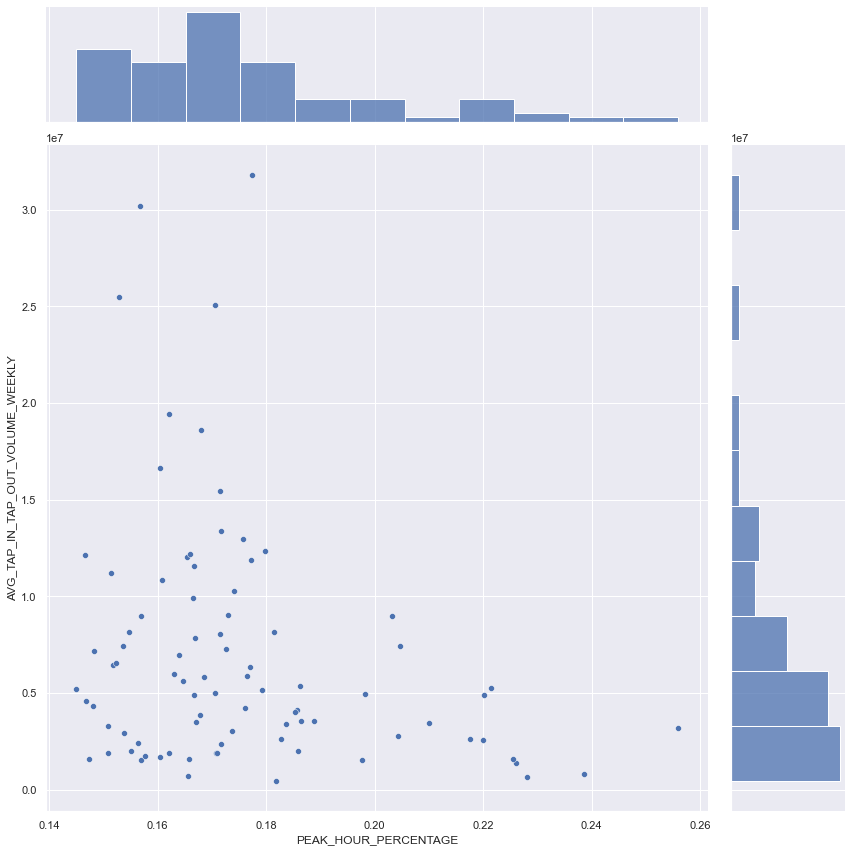

In [4]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'PEAK_HOUR_PERCENTAGE', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [5]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE'])

-0.2516931050720493

In [6]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['PEAK_HOUR_PERCENTAGE'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [7]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [8]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [18114804.62175308]
Coefficients 	: a =  [[-65110581.15503982]]


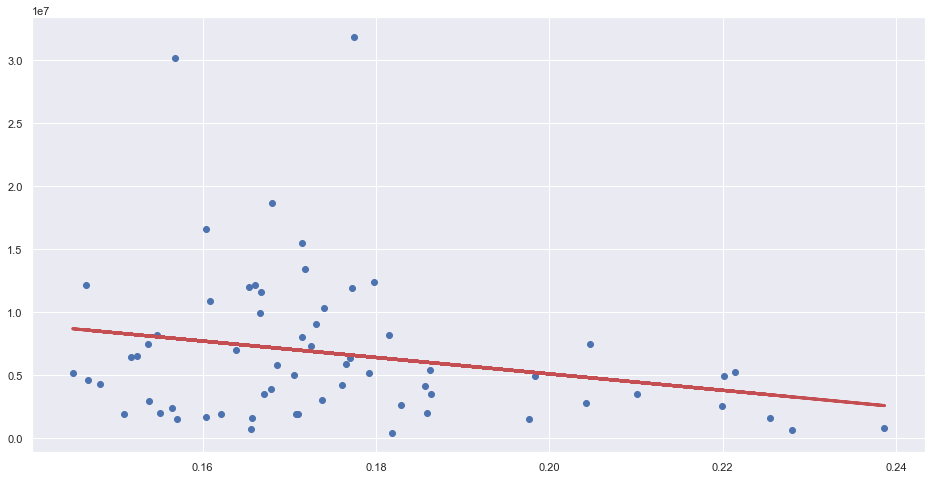

In [9]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [10]:
# Explained Variance in simply the "Score"
ev1 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev1)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse1 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse1)

Explained Variance (R^2) 	: 0.053219158703313396
Mean Squared Error (MSE) 	: 34877941175767.65


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `PEAK_HOUR_PERCENTAGE` in the Test dataset.

In [11]:
y_test_pred = linreg.predict(X_test)

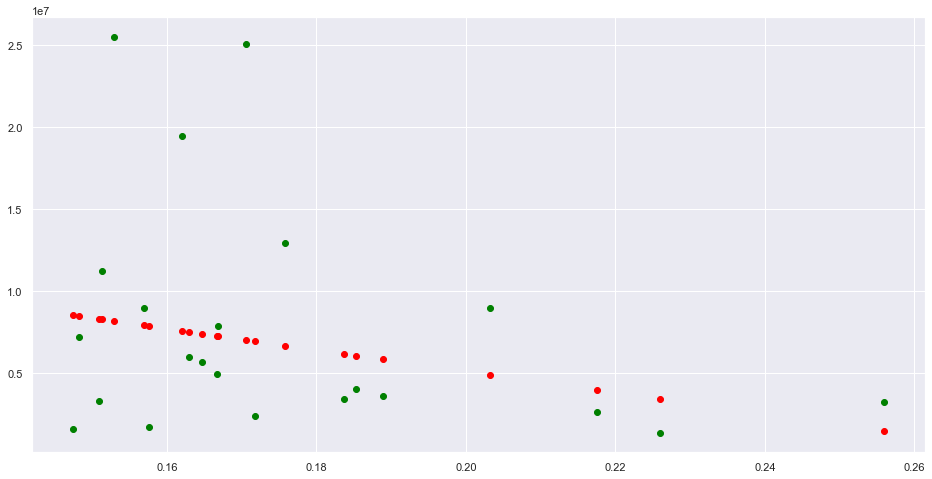

In [12]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [13]:
# Explained Variance in simply the "Score"
evTest1 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest1)
mseTest1 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest1)

Explained Variance (R^2) 	: 0.06268089115210707
Mean Squared Error (MSE) 	: 45607569273300.88


### Variable 2: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using WEEKDAY_PERCENTAGE

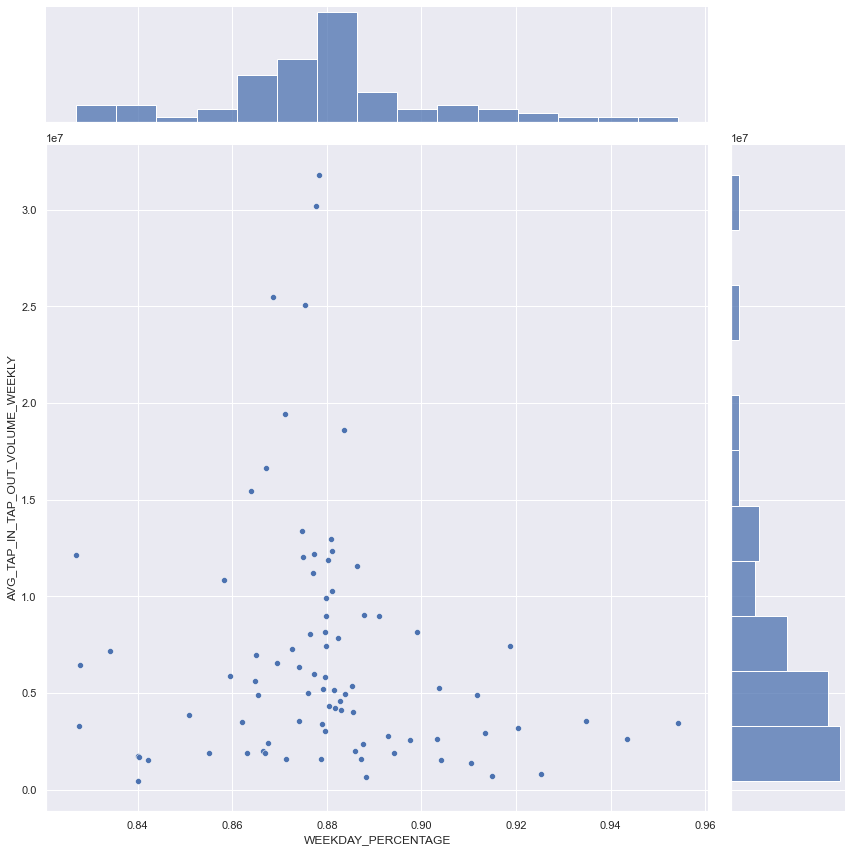

In [14]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'WEEKDAY_PERCENTAGE', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [15]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['WEEKDAY_PERCENTAGE'])

-0.1295248744933444

In [16]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['WEEKDAY_PERCENTAGE'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [17]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [18]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [33712593.69893894]
Coefficients 	: a =  [[-30403805.85912746]]


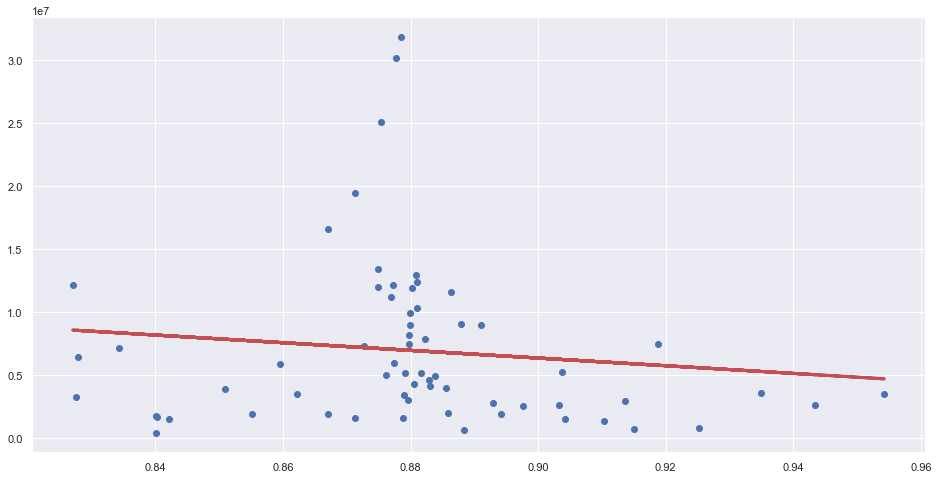

In [19]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [20]:
# Explained Variance in simply the "Score"
ev2 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev2)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse2 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse2)

Explained Variance (R^2) 	: 0.014190607945008149
Mean Squared Error (MSE) 	: 41722464012390.45


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `WEEKDAY_PERCENTAGE` in the Test dataset.

In [21]:
y_test_pred = linreg.predict(X_test)

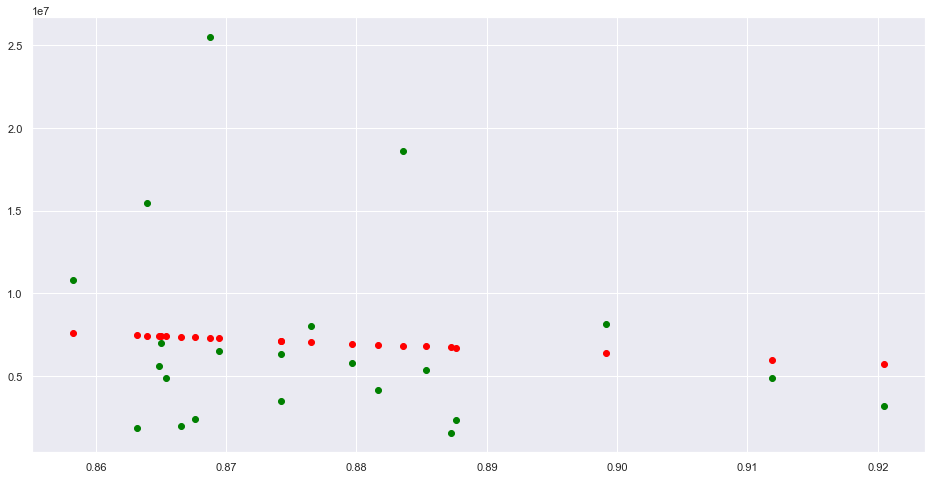

In [22]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [23]:
# Explained Variance in simply the "Score"
evTest2 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest2)
mseTest2 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest2)

Explained Variance (R^2) 	: 0.024821456529511177
Mean Squared Error (MSE) 	: 32706493972232.375


### Variable 3: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using Male Percentage

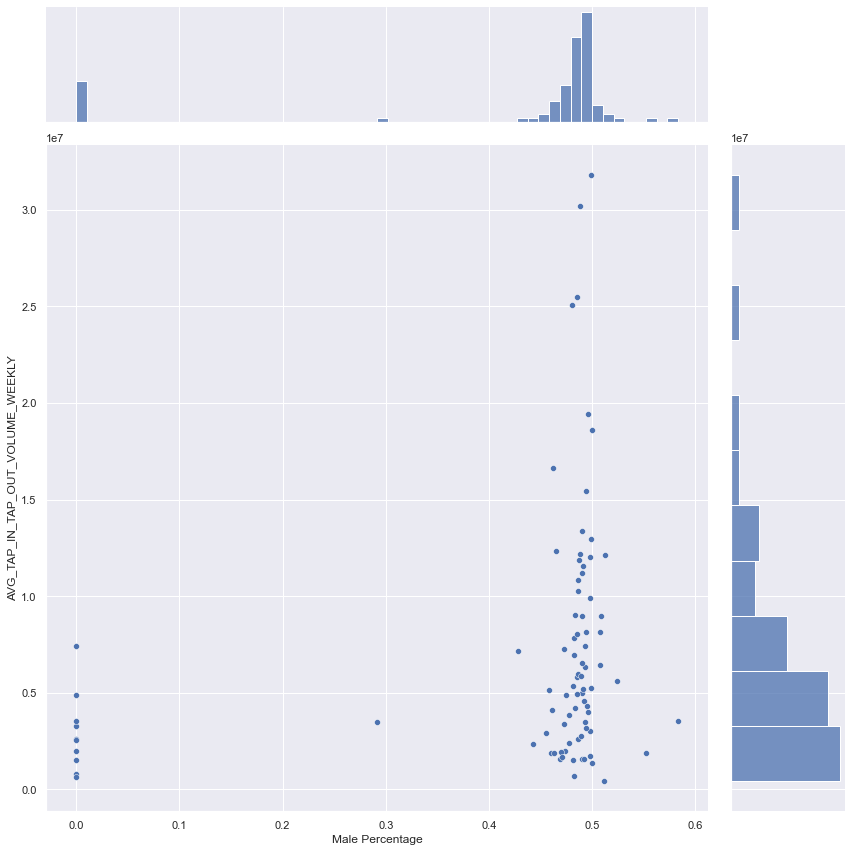

In [24]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Male Percentage', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [25]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Male Percentage'])

0.24232609709596914

In [26]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Male Percentage'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [27]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [28]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2501239.19531926]
Coefficients 	: a =  [[10077629.39368587]]


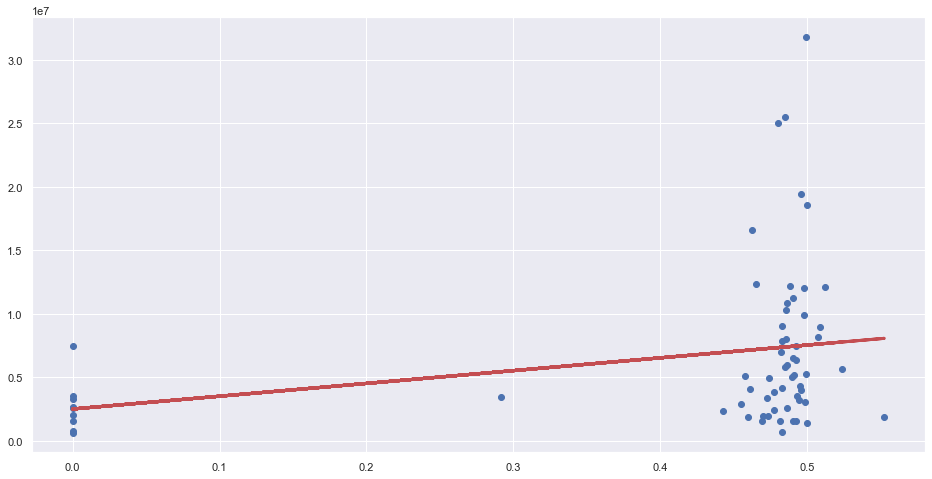

In [29]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [30]:
# Explained Variance in simply the "Score"
ev3 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev3)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse3 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse3)

Explained Variance (R^2) 	: 0.07460092114586958
Mean Squared Error (MSE) 	: 36602660818990.78


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Male Percentage` in the Test dataset.

In [31]:
y_test_pred = linreg.predict(X_test)

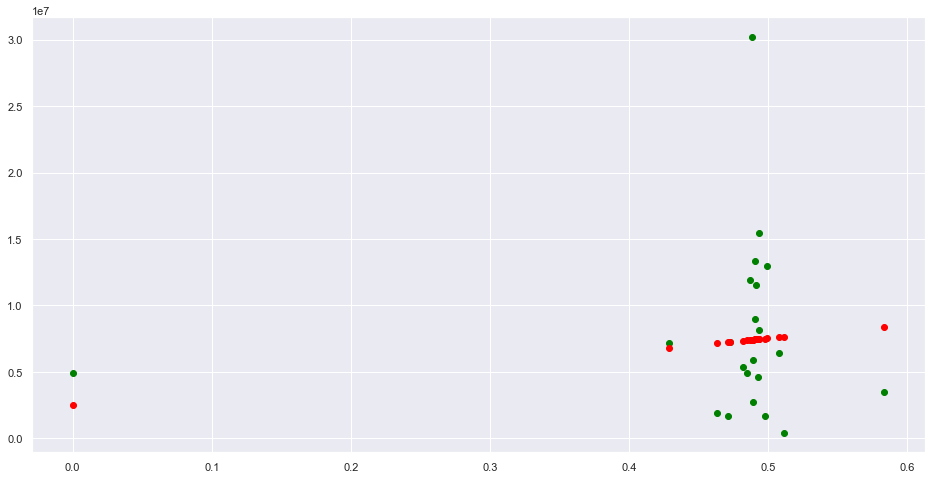

In [32]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [33]:
# Explained Variance in simply the "Score"
evTest3 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest3)
mseTest3 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest3)

Explained Variance (R^2) 	: -0.008902616772715533
Mean Squared Error (MSE) 	: 41075746211097.62


### Variable 4: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 00 - 19

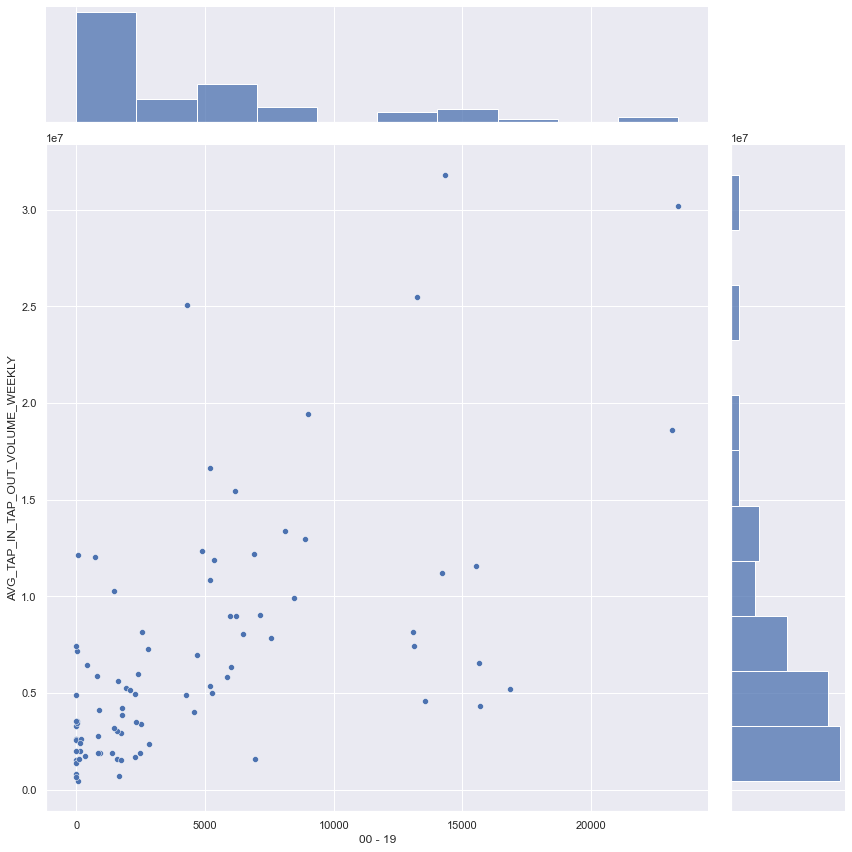

In [34]:
sb.jointplot(data = BusMRTGeoData_reg, x = '00 - 19', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [35]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['00 - 19'])

0.6164596239700507

In [36]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['00 - 19'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [37]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [38]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [4044934.99686079]
Coefficients 	: a =  [[615.20747084]]


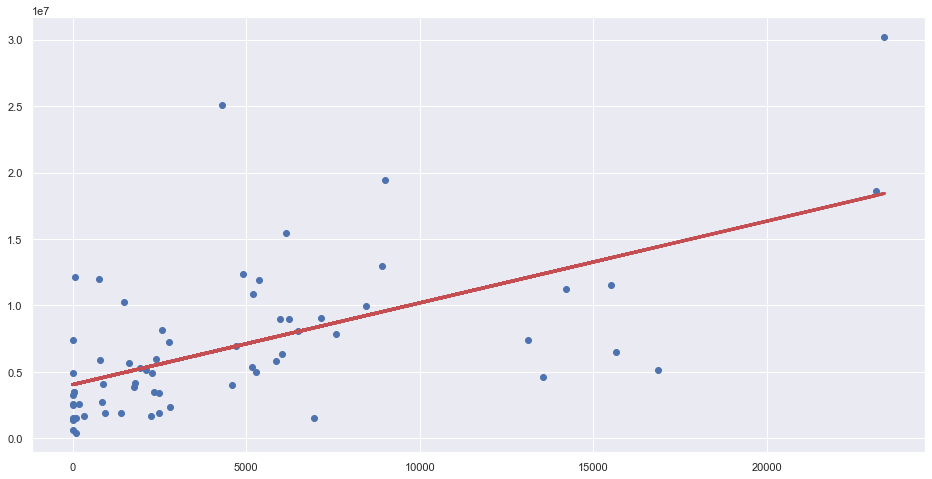

In [39]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [40]:
# Explained Variance in simply the "Score"
ev4 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev4)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse4 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse4)

Explained Variance (R^2) 	: 0.3554256135442778
Mean Squared Error (MSE) 	: 20384071457097.32


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `00 - 19` in the Test dataset.

In [41]:
y_test_pred = linreg.predict(X_test)

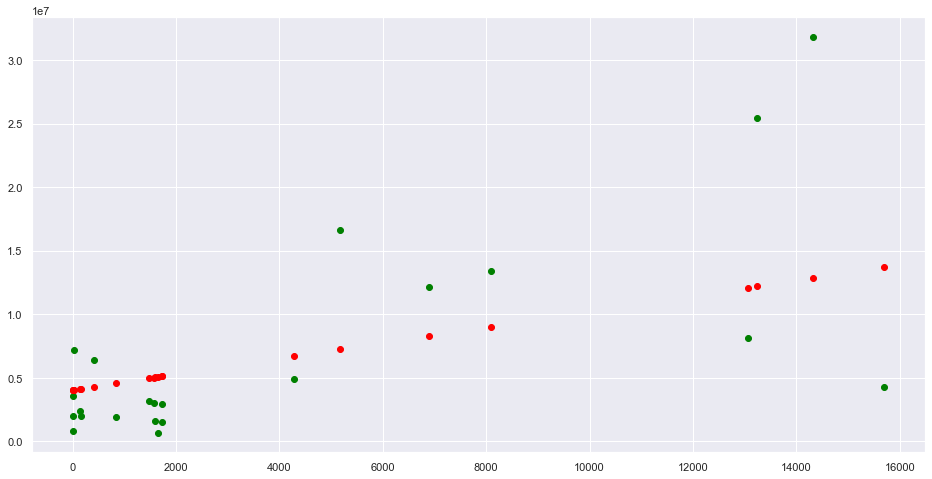

In [42]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [43]:
# Explained Variance in simply the "Score"
evTest4 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest4)
mseTest4 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest4)

Explained Variance (R^2) 	: 0.39280986340761037
Mean Squared Error (MSE) 	: 39251155275528.92


### Variable 5: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 20 - 39

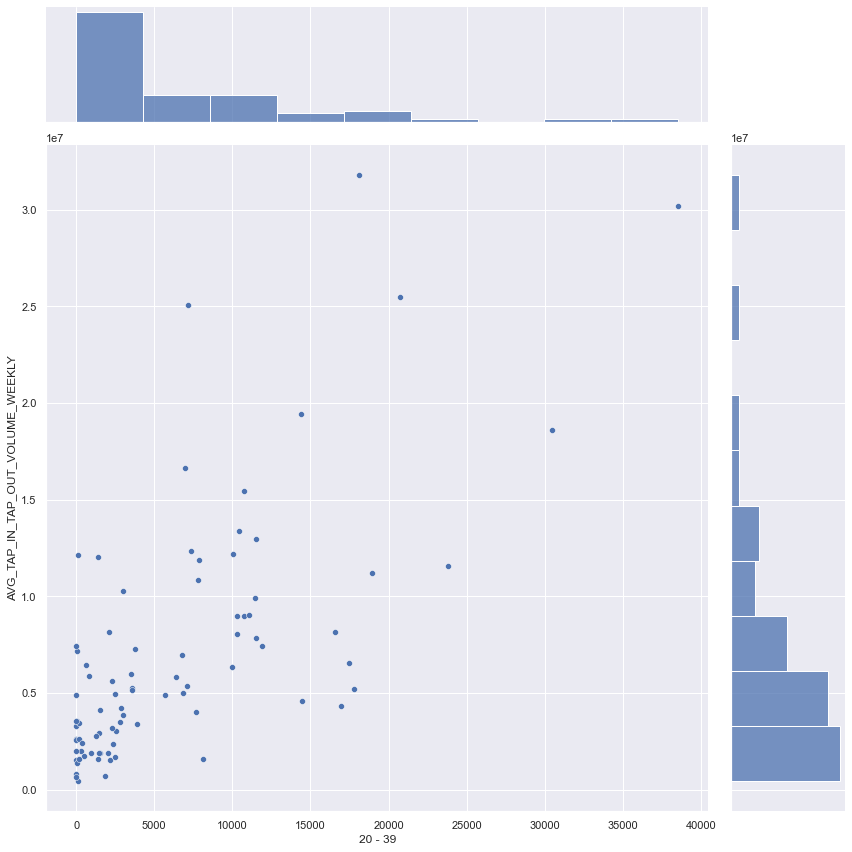

In [44]:
sb.jointplot(data = BusMRTGeoData_reg, x = '20 - 39', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [45]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['20 - 39'])

0.6952759625021925

In [46]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['20 - 39'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [47]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [48]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3240217.64543836]
Coefficients 	: a =  [[605.36691744]]


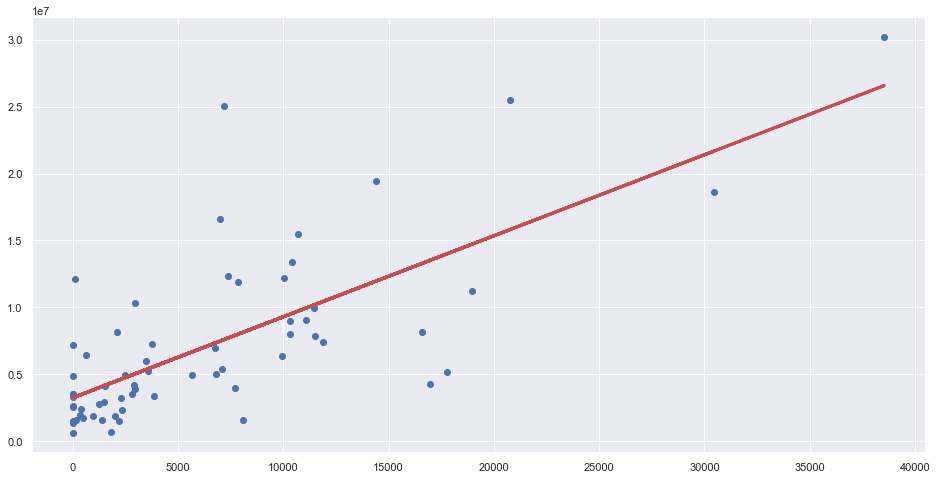

In [49]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [50]:
# Explained Variance in simply the "Score"
ev5 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev5)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse5 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse5)

Explained Variance (R^2) 	: 0.5237487442332927
Mean Squared Error (MSE) 	: 18477083854227.367


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `20 - 39` in the Test dataset.

In [51]:
y_test_pred = linreg.predict(X_test)

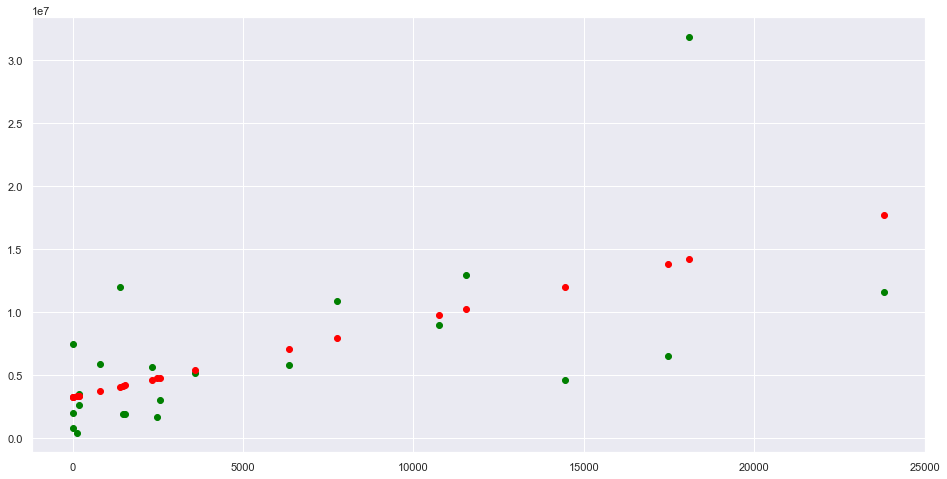

In [52]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [53]:
# Explained Variance in simply the "Score"
evTest5 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest5)
mseTest5 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest5)

Explained Variance (R^2) 	: 0.3777680812354708
Mean Squared Error (MSE) 	: 27184708140477.438


### Variable 6: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 40 - 59

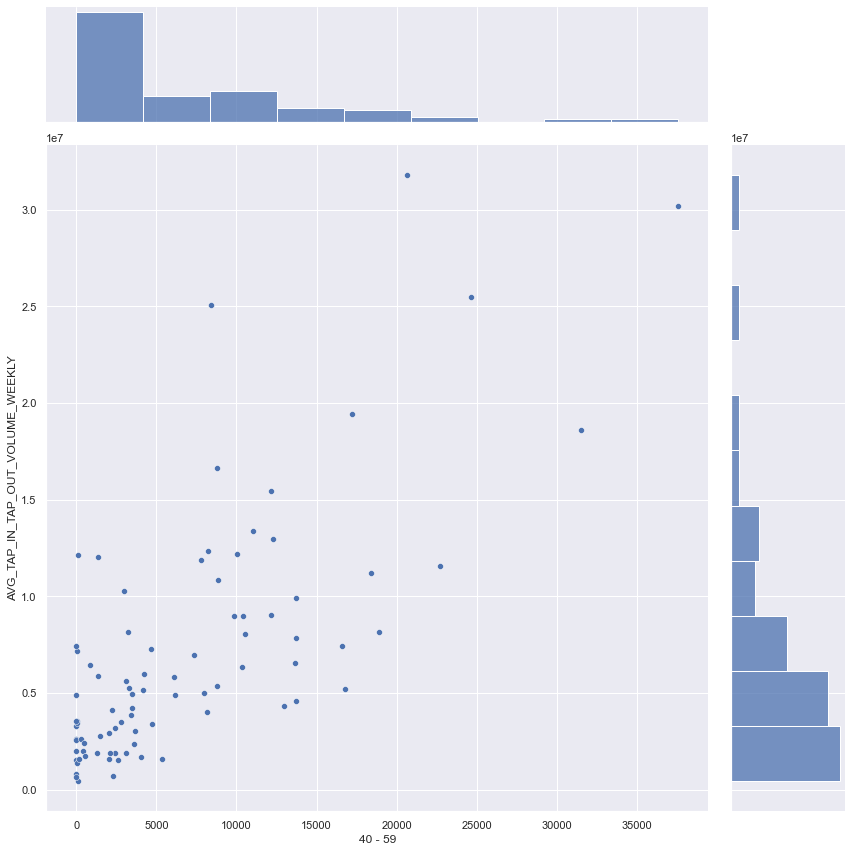

In [54]:
sb.jointplot(data = BusMRTGeoData_reg, x = '40 - 59', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [55]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['40 - 59'])

0.7356997525223683

In [56]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['40 - 59'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [57]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [58]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2915674.58724673]
Coefficients 	: a =  [[648.83359027]]


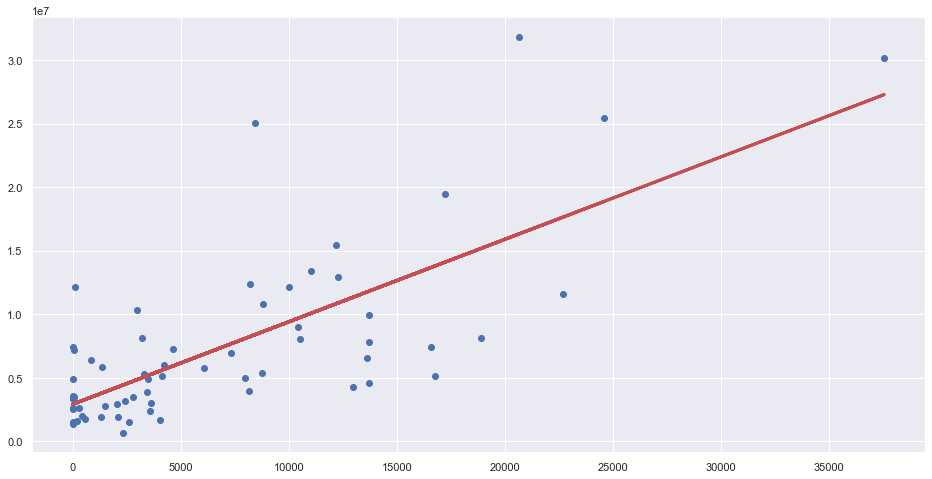

In [59]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [60]:
# Explained Variance in simply the "Score"
ev6 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev6)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse6 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse6)

Explained Variance (R^2) 	: 0.5341164215656914
Mean Squared Error (MSE) 	: 20550543701076.594


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `40 - 59` in the Test dataset.

In [61]:
y_test_pred = linreg.predict(X_test)

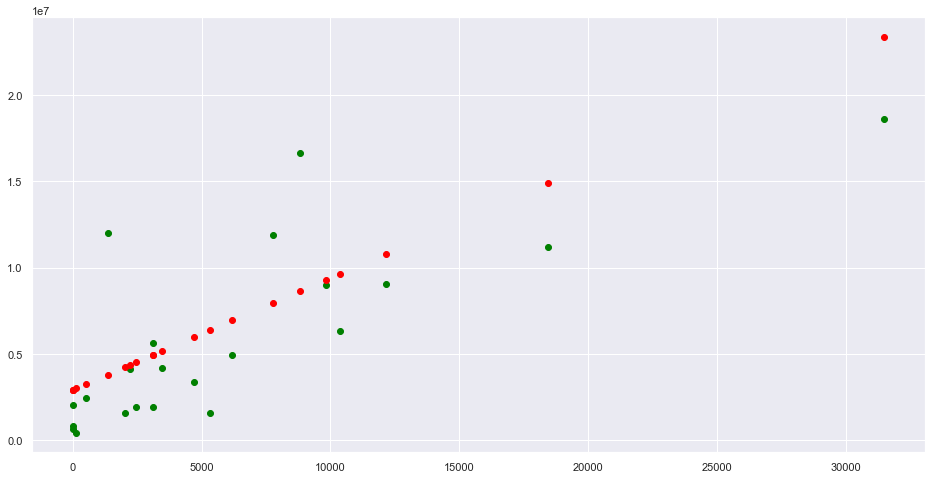

In [62]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [63]:
# Explained Variance in simply the "Score"
evTest6 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest6)
mseTest6 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest6)

Explained Variance (R^2) 	: 0.5381543680180176
Mean Squared Error (MSE) 	: 12407506939840.137


### Variable 7: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using 60 & Over

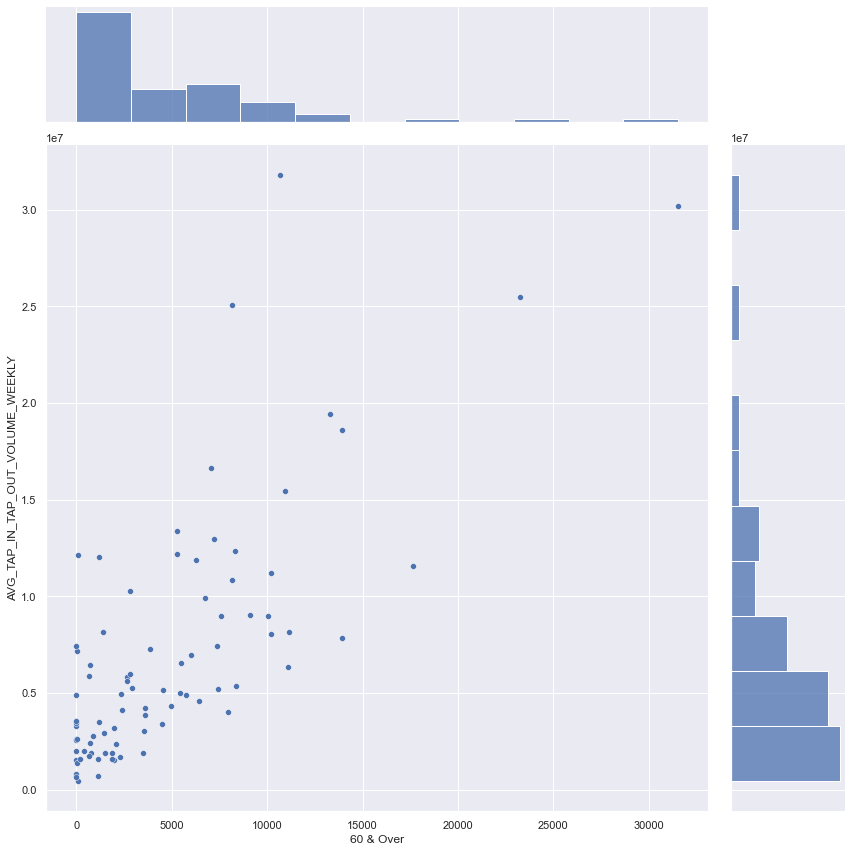

In [64]:
sb.jointplot(data = BusMRTGeoData_reg, x = '60 & Over', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [65]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['60 & Over'])

0.7503595742097162

In [66]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['60 & Over'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [67]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [68]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2970893.73760613]
Coefficients 	: a =  [[826.92986105]]


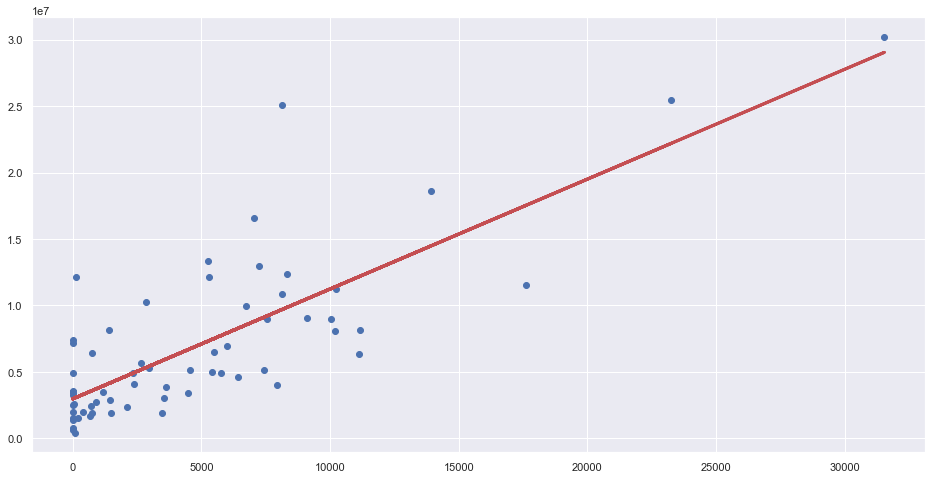

In [69]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [70]:
# Explained Variance in simply the "Score"
ev7 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev7)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse7 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse7)

Explained Variance (R^2) 	: 0.6307806087086403
Mean Squared Error (MSE) 	: 13365609988761.691


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `60 & Over` in the Test dataset.

In [71]:
y_test_pred = linreg.predict(X_test)

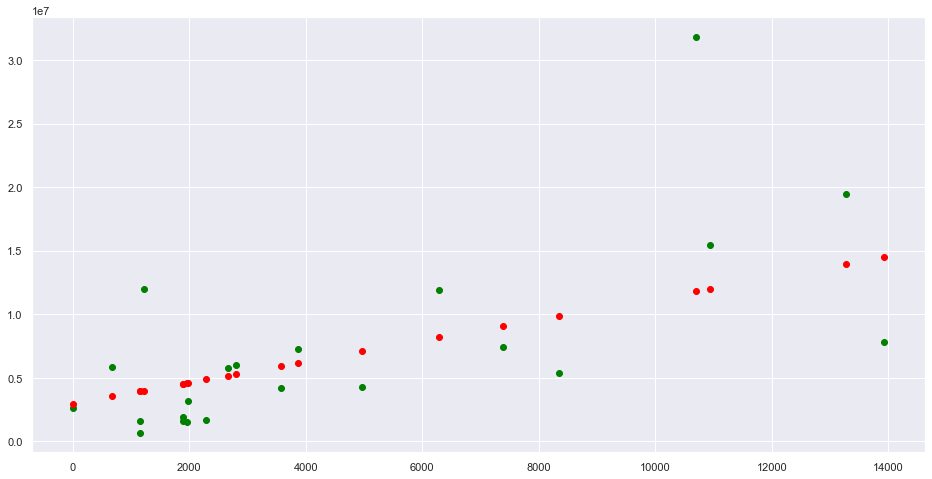

In [72]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [73]:
# Explained Variance in simply the "Score"
evTest7 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest7)
mseTest7 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest7)

Explained Variance (R^2) 	: 0.41621894073651966
Mean Squared Error (MSE) 	: 29917492427097.523


### Variable 8: Predicting AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY using Average Income

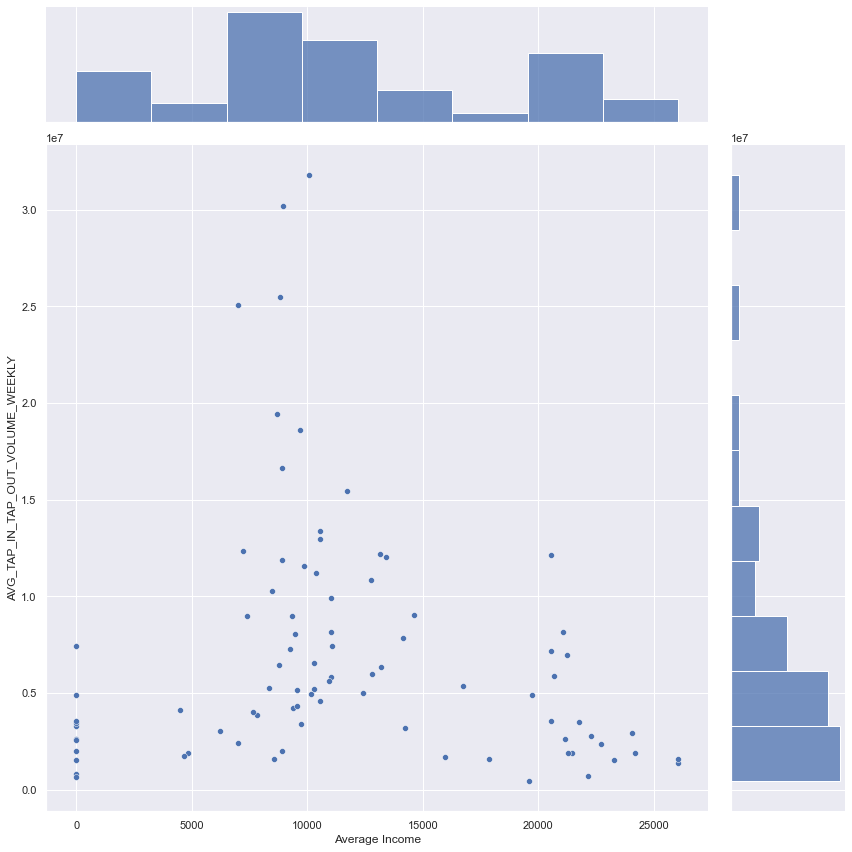

In [74]:
sb.jointplot(data = BusMRTGeoData_reg, x = 'Average Income', y = 'AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY', height = 12)

In [75]:
BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'].corr(BusMRTGeoData_reg['Average Income'])

-0.11799461908286209

In [76]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg['Average Income'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (64, 1) (64, 1)
Test Set  : (22, 1) (22, 1)


In [77]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

#### Visual Representation of the Linear Regression Model

In [78]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [7978086.61896871]
Coefficients 	: a =  [[-88.65885538]]


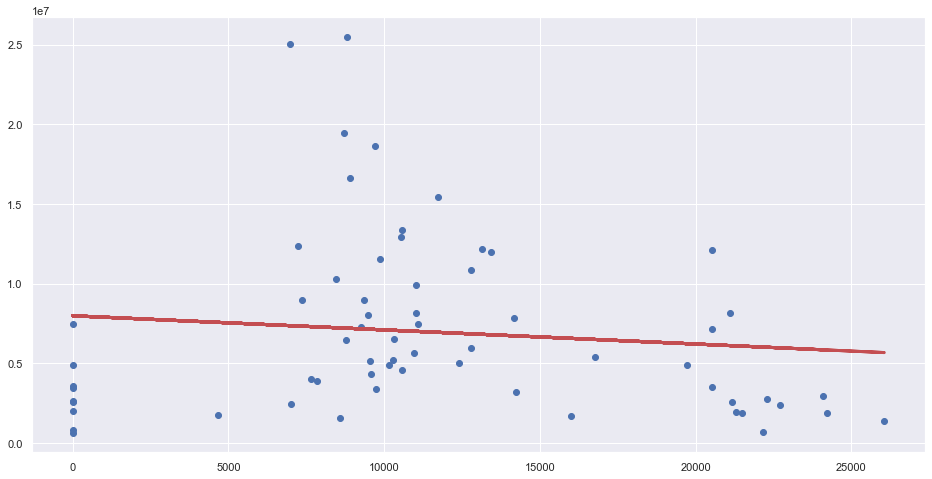

In [79]:
# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [80]:
# Explained Variance in simply the "Score"
ev8 = linreg.score(X_train, y_train)
print("Explained Variance (R^2) \t:", ev8)

# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)

# Compute MSE on the train set
mse8 = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse8)

Explained Variance (R^2) 	: 0.012277981717168429
Mean Squared Error (MSE) 	: 30423292895855.28


#### Prediction of Response based on the Predictor

Predict `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` given `Average Income` in the Test dataset.

In [81]:
y_test_pred = linreg.predict(X_test)

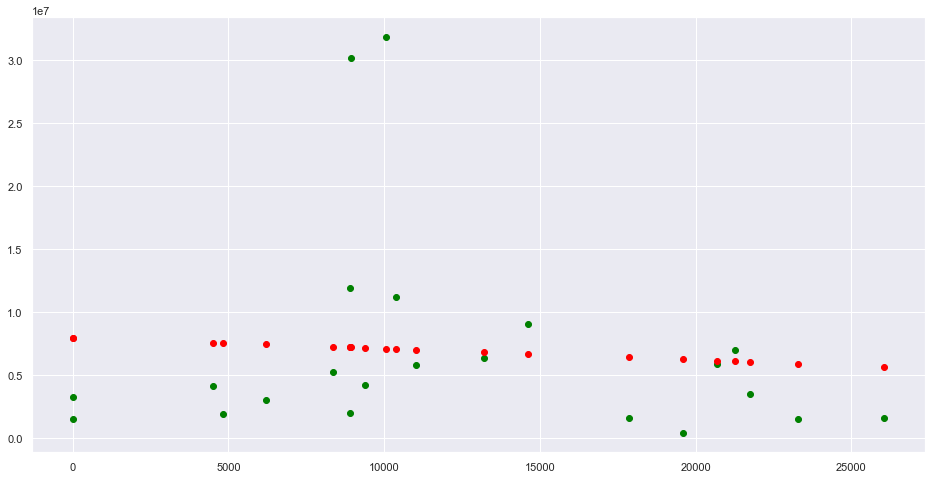

In [82]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [83]:
# Explained Variance in simply the "Score"
evTest8 = linreg.score(X_test, y_test)
print("Explained Variance (R^2) \t:", evTest8)
mseTest8 = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mseTest8)

Explained Variance (R^2) 	: 0.01521726947486779
Mean Squared Error (MSE) 	: 66038297749694.945


### Comparing the Uni-Variate Linear Models

In [84]:
variables = ['PEAK_HOUR_PERCENTAGE', 'WEEKDAY_PERCENTAGE', 'Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over', 'Average Income']
ev = [ev1, ev2, ev3, ev4, ev5, ev6, ev7, ev8]
mse = [mse1, mse2, mse3, mse4, mse5, mse6, mse7, mse8]
evTest = [evTest1, evTest2, evTest3, evTest4, evTest5, evTest6, evTest7, evTest8]
mseTest = [mseTest1, mseTest2, mseTest3, mseTest4, mseTest5, mseTest6, mseTest7, mseTest8]

for i in range(8):
    print(variables[i], ": Explained variance(train):", ev[i], "Mean Squared Error(train):", mse[i], "\nExplained variance(test):", evTest[i], "Mean Squared Error(test):", mseTest[i])
    print("\n")

PEAK_HOUR_PERCENTAGE : Explained variance(train): 0.053219158703313396 Mean Squared Error(train): 34877941175767.65 
Explained variance(test): 0.06268089115210707 Mean Squared Error(test): 45607569273300.88


WEEKDAY_PERCENTAGE : Explained variance(train): 0.014190607945008149 Mean Squared Error(train): 41722464012390.45 
Explained variance(test): 0.024821456529511177 Mean Squared Error(test): 32706493972232.375


Male Percentage : Explained variance(train): 0.07460092114586958 Mean Squared Error(train): 36602660818990.78 
Explained variance(test): -0.008902616772715533 Mean Squared Error(test): 41075746211097.62


00 - 19 : Explained variance(train): 0.3554256135442778 Mean Squared Error(train): 20384071457097.32 
Explained variance(test): 0.39280986340761037 Mean Squared Error(test): 39251155275528.92


20 - 39 : Explained variance(train): 0.5237487442332927 Mean Squared Error(train): 18477083854227.367 
Explained variance(test): 0.3777680812354708 Mean Squared Error(test): 271847081

* `AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY` vs `60 & Over` has the best Explained Variance (R^2) and minimum MSE on both the Train and Test Setsout of the models.   
* 5 variables to be used in the regression models would be `Male Percentage`, `00 - 19`, `20 - 39`, `40 - 59`, `60 & Over`
   


## Multi-Variate Linear Models

### Multi-Variate Regression

In [85]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (64, 5) (64, 1)
Test Set  : (22, 5) (22, 1)


LinearRegression()

#### Coefficients of the Linear Regression Model

In [86]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [2883563.25036296]
Coefficients 	: a =  [[ 1.33699012e+05 -1.57565558e+03  4.73904473e+02  1.25871443e+03
  -9.21141075e+01]]


#### Prediction of Response based on the Predictor

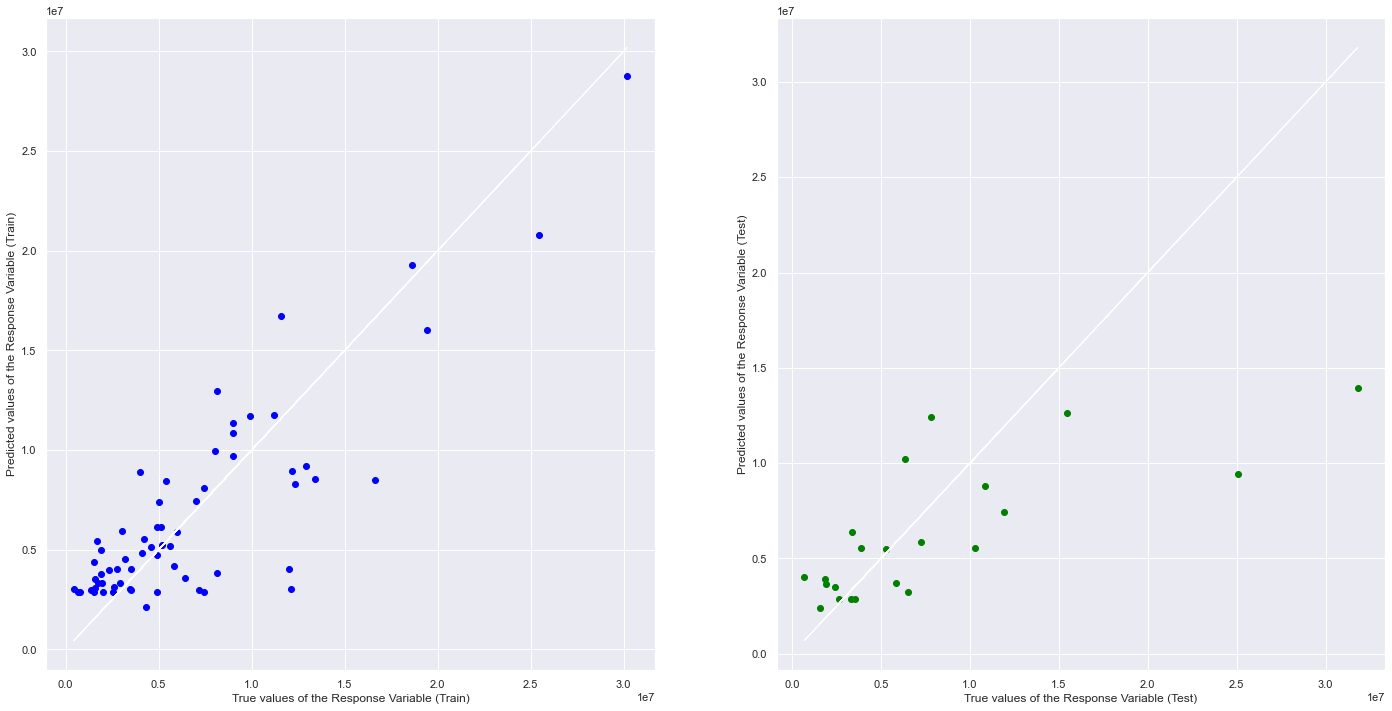

In [87]:
# Predict values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression Model

In [88]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.7301916795542984
Mean Squared Error (MSE) on Train Set 	: 9119229243571.469
Explained Variance (R^2) on Train Set 	: 0.4456743636287477
Mean Squared Error (MSE) on Test Set 	: 31923848625811.227
R^2 Score 	: 0.4456743636287477


### Decision Tree Regression

In [89]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

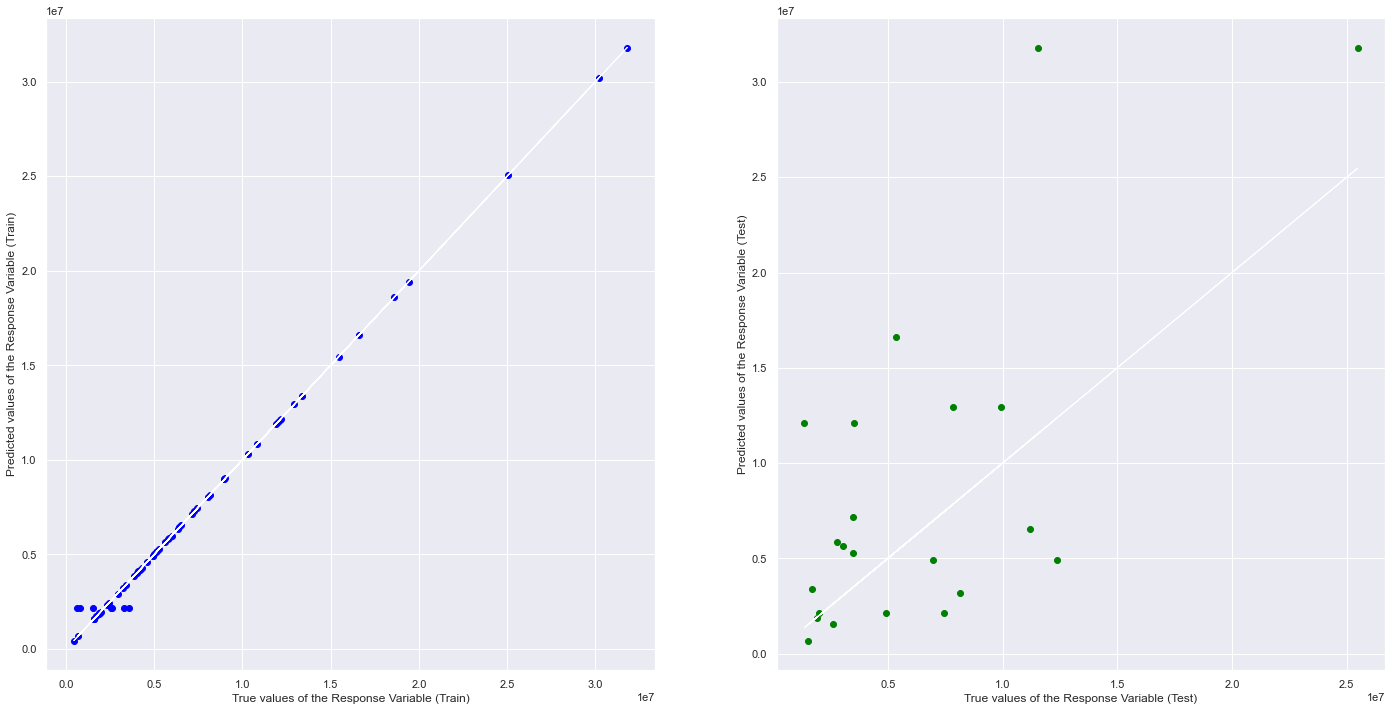

In [90]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Decision Tree Regression Model

In [91]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6041876951080745
Mean Squared Error (MSE) on Train Set 	: 127628391415.58482
Explained Variance (R^2) on Train Set 	: 0.7173482250794674
Mean Squared Error (MSE) on Test Set 	: 44550062647926.62
R^2 Score 	: -0.5174806210566409


### Random Forest Regression

In [92]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(BusMRTGeoData_reg['AVG_TAP_IN_TAP_OUT_VOLUME_WEEKLY'])
X = pd.DataFrame(BusMRTGeoData_reg[['Male Percentage', '00 - 19', '20 - 39', '40 - 59', '60 & Over']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.ensemble import RandomForestRegressor
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

<ipython-input-92-d14281fc2dd5>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regress.fit(X_train, y_train)


RandomForestRegressor()

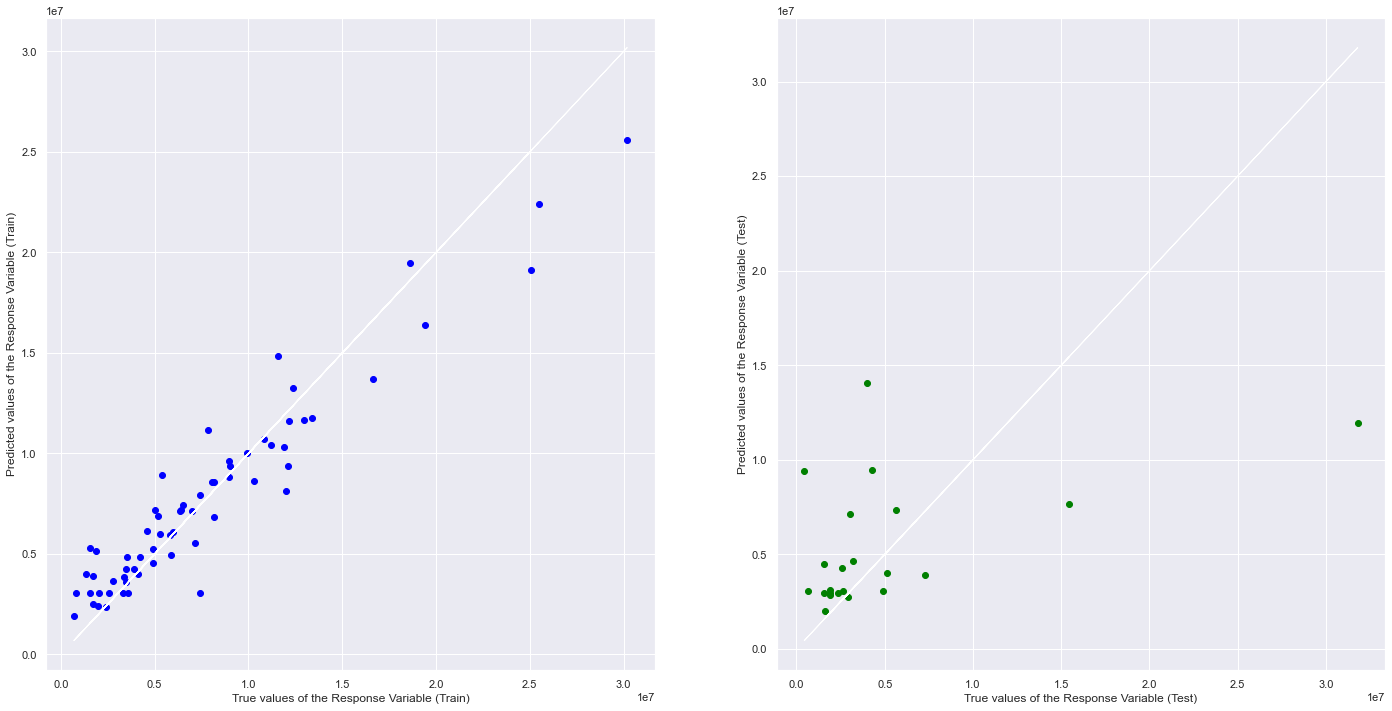

In [93]:
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Random Forest Regression Model

In [94]:
from sklearn.metrics import r2_score
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))
print("R^2 Score \t:", r2_score(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6276942493635727
Mean Squared Error (MSE) on Train Set 	: 3789860401757.5933
Explained Variance (R^2) on Train Set 	: 0.5739622325573076
Mean Squared Error (MSE) on Test Set 	: 32975984047783.535
R^2 Score 	: 0.2505862354808257
